# EDA 

Librerias

In [112]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster, TimestampedGeoJson

Importamos el CSV

In [115]:
df = pd.read_csv('max_Kafka_ingest_processing.csv')
df

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21T23:30:01.505415+00:00Z
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21T23:30:01.505565+00:00Z
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21T23:30:01.505660+00:00Z
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21T23:30:01.505853+00:00Z
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21T23:30:01.506040+00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22T02:27:21.736920+00:00Z
19585,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22T02:26:21.245013+00:00Z
19586,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22T02:31:23.470951+00:00Z
19587,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22T02:30:23.027314+00:00Z


Verificamos si hay nulos

In [118]:
df.isna().sum()

icao24                0
callsign            568
origin_country        0
time_position         0
last_contact          0
longitude             0
latitude              0
baro_altitude       651
on_ground             0
velocity              0
heading               0
timestamp_ingest      0
dtype: int64

Hacemos un resumen completo de la data:

In [121]:
df.describe()

,time_position,last_contact,longitude,latitude,baro_altitude,velocity,heading
count,1.958900e+04,1.958900e+04,19589.000000,19589.000000,18938.000000,19589.000000,19589.000000
mean,1.750554e+09,1.750554e+09,-54.068829,-17.370890,7934.795567,190.155746,170.228615
std,3.826546e+03,3.826630e+03,13.016280,13.379963,3890.608997,63.772778,105.325297
min,1.750548e+09,1.750548e+09,-89.986600,-54.967300,-15.240000,0.000000,0.000000
25%,1.750551e+09,1.750551e+09,-59.839100,-25.186500,4505.325000,157.380000,65.570000
50%,1.750554e+09,1.750554e+09,-48.416400,-22.038400,9776.460000,212.650000,177.290000
75%,1.750558e+09,1.750558e+09,-46.430800,-8.676500,10972.800000,236.100000,244.650000
max,1.750561e+09,1.750561e+09,-34.005800,14.994400,36057.840000,293.050000,359.840000


La idea es que probablemente los aviones en tierra tengan null tanto en baro_altitude y callsign.

In [124]:
df[df['on_ground'] == True]

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
12,e48b64,TAM3865,Brazil,1750548481,1750548481,-46.6564,-23.6294,NaN,True,5.40,236.25,2025-06-21T23:30:01.506830+00:00Z
55,e4950d,GLO1431,Brazil,1750548292,1750548292,-46.6538,-23.6326,NaN,True,8.75,329.06,2025-06-21T23:30:01.519221+00:00Z
76,e48b64,TAM3865,Brazil,1750548481,1750548481,-46.6564,-23.6294,NaN,True,5.40,236.25,2025-06-21T23:33:02.926892+00:00Z
113,e495c6,GLO1387,Brazil,1750548700,1750548733,-46.6600,-23.6216,777.24,True,70.07,147.59,2025-06-21T23:33:02.941294+00:00Z
135,e48b64,TAM3865,Brazil,1750548481,1750548481,-46.6564,-23.6294,NaN,True,5.40,236.25,2025-06-21T23:29:01.049848+00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
19294,adf21a,WUP9,United States,1750554585,1750554702,-85.7377,-54.9671,9144.00,True,9.26,19.69,2025-06-22T01:11:47.872987+00:00Z
19354,ad273b,DAL3235,United States,1750555005,1750555005,-85.7269,-54.9639,NaN,True,0.00,45.00,2025-06-22T01:16:49.963999+00:00Z
19467,adf21a,WUP9,United States,1750554585,1750554645,-85.7377,-54.9671,9144.00,True,8.23,19.69,2025-06-22T01:10:47.418920+00:00Z
19476,adf21a,WUP9,United States,1750554568,1750554585,-85.7544,-54.9673,NaN,True,3.86,39.38,2025-06-22T01:09:46.990100+00:00Z


Verificamos cuantos aviones unicos hay en el dataset para tener una idea de cuantos aviones en promedio llegan en un dataset:

In [130]:
pd.unique(df['icao24']).shape

(514,)

In [133]:
df.groupby('icao24').size()

icao24
0201a4    72
040075    82
06a07e    42
06a1cd    96
0acac6    16
          ..
e8062d    80
e94b6b     7
e94c42     7
e94c86     9
e94c8f    18
Length: 514, dtype: int64

In [136]:
df['icao24'].value_counts()

icao24
e0814b    137
e49c01    123
e49c08    122
e4a012    116
e0b149    114
         ... 
a7b6bf      2
a56f7b      2
e48dae      1
e4982e      1
e80275      1
Name: count, Length: 514, dtype: int64

Manejamos el timestamp para tener un mejor valance de la data (hay que tener en cuenta que el horario con el que trabajamos es UTC por el 00:00Z).

In [139]:
# Eliminar la 'Z' del final de cada timestamp
df['timestamp_ingest'] = df['timestamp_ingest'].str.replace('Z', '', regex=False)

# Convertir a datetime
df['timestamp_ingest'] = pd.to_datetime(df['timestamp_ingest'])

# Verificamos
display(df)

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:01.505415+00:00
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:01.505565+00:00
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:01.505660+00:00
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:01.505853+00:00
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:01.506040+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:21.736920+00:00
19585,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:21.245013+00:00
19586,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:23.470951+00:00
19587,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:23.027314+00:00


In [142]:
print(df['timestamp_ingest'].head())

0   2025-06-21 23:30:01.505415+00:00
1   2025-06-21 23:30:01.505565+00:00
2   2025-06-21 23:30:01.505660+00:00
3   2025-06-21 23:30:01.505853+00:00
4   2025-06-21 23:30:01.506040+00:00
Name: timestamp_ingest, dtype: datetime64[ns, UTC]


In [145]:
print(type(df['timestamp_ingest']))

<class 'pandas.core.series.Series'>


Hacemos la separacion de los aviones en tierra y en aire para tener en explorar mejor la data

In [148]:
df_on_ground = df[df['on_ground'] == True]
df_on_air = df[df['on_ground'] == False]

Visualizamos todos los aviones que estan en tierra

In [151]:
df_on_ground

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
12,e48b64,TAM3865,Brazil,1750548481,1750548481,-46.6564,-23.6294,NaN,True,5.40,236.25,2025-06-21 23:30:01.506830+00:00
55,e4950d,GLO1431,Brazil,1750548292,1750548292,-46.6538,-23.6326,NaN,True,8.75,329.06,2025-06-21 23:30:01.519221+00:00
76,e48b64,TAM3865,Brazil,1750548481,1750548481,-46.6564,-23.6294,NaN,True,5.40,236.25,2025-06-21 23:33:02.926892+00:00
113,e495c6,GLO1387,Brazil,1750548700,1750548733,-46.6600,-23.6216,777.24,True,70.07,147.59,2025-06-21 23:33:02.941294+00:00
135,e48b64,TAM3865,Brazil,1750548481,1750548481,-46.6564,-23.6294,NaN,True,5.40,236.25,2025-06-21 23:29:01.049848+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19294,adf21a,WUP9,United States,1750554585,1750554702,-85.7377,-54.9671,9144.00,True,9.26,19.69,2025-06-22 01:11:47.872987+00:00
19354,ad273b,DAL3235,United States,1750555005,1750555005,-85.7269,-54.9639,NaN,True,0.00,45.00,2025-06-22 01:16:49.963999+00:00
19467,adf21a,WUP9,United States,1750554585,1750554645,-85.7377,-54.9671,9144.00,True,8.23,19.69,2025-06-22 01:10:47.418920+00:00
19476,adf21a,WUP9,United States,1750554568,1750554585,-85.7544,-54.9673,NaN,True,3.86,39.38,2025-06-22 01:09:46.990100+00:00


Visualizamos todos los aviones que estan en el aire

In [154]:
df_on_air

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:01.505415+00:00
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:01.505565+00:00
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:01.505660+00:00
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:01.505853+00:00
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:01.506040+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:21.736920+00:00
19585,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:21.245013+00:00
19586,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:23.470951+00:00
19587,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:23.027314+00:00


Sospechamos que los aviones en tierra son los que no tienen callsign, pero vemos que en verdad la mayoria de los aviones sin callsign estan en el aire:

In [157]:
df_on_air.isna().sum()

icao24                0
callsign            450
origin_country        0
time_position         0
last_contact          0
longitude             0
latitude              0
baro_altitude         3
on_ground             0
velocity              0
heading               0
timestamp_ingest      0
dtype: int64

Verificamos que aviones estan en el aire sin callsign

In [160]:
df_on_air_unidentified = df_on_air[df_on_air['callsign'].isna()]
df_on_air_unidentified

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
207,e49907,NaN,Brazil,1750550520,1750550523,-46.2553,-22.5959,5440.68,False,190.18,188.09,2025-06-22 00:02:16.567122+00:00
217,e0814b,NaN,Argentina,1750550487,1750550488,-45.1601,-25.0175,10972.80,False,201.19,225.93,2025-06-22 00:02:16.574611+00:00
219,e4943f,NaN,Brazil,1750550522,1750550527,-51.4518,-27.8806,10668.00,False,248.27,42.82,2025-06-22 00:02:16.574838+00:00
240,0c20de,NaN,Panama,1750550417,1750550417,-56.8194,-32.6112,11277.60,False,212.87,163.14,2025-06-22 00:02:16.578095+00:00
338,e491af,NaN,Brazil,1750548476,1750548477,-46.3588,-22.8641,4572.00,False,150.54,253.11,2025-06-21 23:28:00.612280+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:21.736920+00:00
19585,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:21.245013+00:00
19586,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:23.470951+00:00
19587,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:23.027314+00:00


Verificamos los aviones en tierra sin callsign

In [163]:
df_on_ground_unidentified = df_on_ground[df_on_ground['callsign'].isna()]
df_on_ground_unidentified

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
476,a1d546,NaN,United States,1750550624,1750550624,-58.5302,-34.8189,NaN,True,6.17,163.12,2025-06-22 00:04:17.469433+00:00
819,a1d546,NaN,United States,1750550666,1750550666,-58.5287,-34.8206,NaN,True,5.66,104.06,2025-06-22 00:06:18.369841+00:00
1012,aabbc9,NaN,United States,1750551271,1750551271,-58.5287,-34.8206,NaN,True,5.66,104.06,2025-06-22 00:18:23.821816+00:00
1366,a1d546,NaN,United States,1750550666,1750550666,-58.5287,-34.8206,NaN,True,5.66,104.06,2025-06-22 00:05:17.928894+00:00
1710,aabbc9,NaN,United States,1750551252,1750551252,-58.5298,-34.8203,NaN,True,4.37,104.06,2025-06-22 00:14:21.994205+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
15865,e80269,NaN,Chile,1750550622,1750550635,-76.3751,-6.4983,NaN,True,48.55,170.24,2025-06-22 00:04:17.450524+00:00
15928,e80269,NaN,Chile,1750550622,1750550704,-76.3751,-6.4983,NaN,True,81.79,170.95,2025-06-22 00:05:17.913342+00:00
15967,e48198,NaN,Brazil,1750557296,1750557301,-40.2816,-20.2662,NaN,True,0.00,261.56,2025-06-22 01:55:06.872265+00:00
16756,e48198,NaN,Brazil,1750557116,1750557116,-40.2817,-20.2661,NaN,True,0.06,261.56,2025-06-22 01:52:05.592881+00:00


### Manejo de atipicos y nans

- Imputamos los valores faltantes, para el caso de los callsign, los llamaremos unidentified, .

-  Para el caso de los baro_altitude, forzaremos que todos los samples tengan 0, ya que estos aviones se encuentran en tierra y vemos que hay valores atipicos, por ejemplo hay numeros como 777.07 lo cual se trata de un error en la trasnmicion de los datos.

- Tenemos que tener en cuenta que como vismos, hay samples de aviones en aire con baro_altitud nan, por lo que esos valores los eliminaremos posteriormente, ya que representan menos del 0.1% de nuestro dataset.

- La mayoria de los valores "atipicos", no los tocaremos completamente, por ejemplo en velocidades, tenemos que garantizar que todas sean positivas, al igual que heading y baro_altitud, pero a parte de eso, lo demas lo tomaremos como normal: hay aviones en tierra con velocidades altas, podemos suponer que estan en despegue, hay headings igualemnete en tierra bajas, podemos suponer que esta despegando de una forma diferente (para esto se requiere de informacion sobre aeronautica y aviacion).

In [241]:
df

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:01.505415+00:00
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:01.505565+00:00
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:01.505660+00:00
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:01.505853+00:00
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:01.506040+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:21.736920+00:00
19585,347259,NaN,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:21.245013+00:00
19586,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:23.470951+00:00
19587,347259,NaN,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:23.027314+00:00


Hacemos una copia del dataset original para hacer las modificaciones necesarias

In [244]:
df_modified = df.copy()

Ponemos 'unidentified' a todos los aviones sin callsign 

In [247]:
df_modified['callsign'] = df_modified['callsign'].fillna('unidentified')
df_modified.isna().sum()

icao24                0
callsign              0
origin_country        0
time_position         0
last_contact          0
longitude             0
latitude              0
baro_altitude       651
on_ground             0
velocity              0
heading               0
timestamp_ingest      0
dtype: int64

Forzamos a todos los aviones en tierra con un bar_altitude de 0. Sabemos que en los momentos en los que el avion esta despegando este valor puede aumentar a pesar de que aun este en tierra, pero lo tomaremos como si esta en tierra todo porque para nuestro proposito, un avion recien despegando no genera impacto significativo en el aire, pero si en la tierra.

In [250]:
df_modified.loc[df_modified['on_ground'] == True, 'baro_altitude'] = 0
df_modified.isna().sum()

icao24              0
callsign            0
origin_country      0
time_position       0
last_contact        0
longitude           0
latitude            0
baro_altitude       3
on_ground           0
velocity            0
heading             0
timestamp_ingest    0
dtype: int64

Eliminamos los samples con nulos sobrantes. Generalmente seran samples con baro_altitude nan, o algun otro datos, por ejemplo la logitude, latitude, pero esto es muy raro que suceda y esta informacion perdida representara menos del 1% de toda la data.

In [253]:
df_modified = df_modified.dropna()
df_modified.isna().sum()

icao24              0
callsign            0
origin_country      0
time_position       0
last_contact        0
longitude           0
latitude            0
baro_altitude       0
on_ground           0
velocity            0
heading             0
timestamp_ingest    0
dtype: int64

Ahora verificamos que los features baro_altitude, velocity y heading tengan valores positivos

In [256]:
# Visualizamos baro_altitude son los que tienen negativos
df_modified[df_modified['baro_altitude'] < 0]

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
1738,a1863b,DAL60,United States,1750551259,1750551259,-43.2298,-22.7953,-15.24,False,95.12,74.31,2025-06-22 00:14:22.004403+00:00
4245,e49523,GLO7612,Brazil,1750552710,1750552710,-43.2310,-22.7956,-7.62,False,90.10,74.77,2025-06-22 00:38:33.152057+00:00
5896,e48e09,unidentified,Brazil,1750553128,1750553129,-43.2270,-22.7946,-7.62,False,92.86,74.58,2025-06-22 00:45:36.178589+00:00


In [259]:
# Visualizamos velocidades son los que tienen negativos
df_modified[df_modified['velocity'] < 0]

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest


In [262]:
# Visualizamos headings son los que tienen negativos
df_modified[df_modified['heading'] < 0]

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest


Colocamos como valor absoluto estos features para garantizar que si o si sean positivos

In [265]:
df_modified['baro_altitude'] = df_modified['baro_altitude'].abs()
df_modified['velocity'] = df_modified['velocity'].abs()
df_modified['heading'] = df_modified['heading'].abs()

Visualizamos el dataframe actual:

In [268]:
df_modified

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:01.505415+00:00
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:01.505565+00:00
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:01.505660+00:00
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:01.505853+00:00
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:01.506040+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:21.736920+00:00
19585,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:21.245013+00:00
19586,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:23.470951+00:00
19587,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:23.027314+00:00


### Manejo del tiempo

Aqui generaremos features con el año, mes, dia, hora y minuto. Ademas, el timestamp de ingesta lo modificaremos para aproximarlo a los minutos.

In [271]:
# Modificamos el timestamp_ingest y lo aproximamos a los minutos
df_modified['timestamp'] = df_modified['timestamp_ingest'].dt.floor('min') 
df_modified

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest,timestamp
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:01.505415+00:00,2025-06-21 23:30:00+00:00
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:01.505565+00:00,2025-06-21 23:30:00+00:00
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:01.505660+00:00,2025-06-21 23:30:00+00:00
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:01.505853+00:00,2025-06-21 23:30:00+00:00
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:01.506040+00:00,2025-06-21 23:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:21.736920+00:00,2025-06-22 02:27:00+00:00
19585,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:21.245013+00:00,2025-06-22 02:26:00+00:00
19586,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:23.470951+00:00,2025-06-22 02:31:00+00:00
19587,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:23.027314+00:00,2025-06-22 02:30:00+00:00


In [274]:
# Agregamos los features de año, mes, dia, hora y minuto
df_modified['año'] = df_modified['timestamp'].dt.year
df_modified['mes'] = df_modified['timestamp'].dt.month
df_modified['dia'] = df_modified['timestamp'].dt.day
df_modified['hora'] = df_modified['timestamp'].dt.hour
df_modified['minuto'] = df_modified['timestamp'].dt.minute

In [277]:
df_modified

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp_ingest,timestamp,año,mes,dia,hora,minuto
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:01.505415+00:00,2025-06-21 23:30:00+00:00,2025,6,21,23,30
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:01.505565+00:00,2025-06-21 23:30:00+00:00,2025,6,21,23,30
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:01.505660+00:00,2025-06-21 23:30:00+00:00,2025,6,21,23,30
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:01.505853+00:00,2025-06-21 23:30:00+00:00,2025,6,21,23,30
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:01.506040+00:00,2025-06-21 23:30:00+00:00,2025,6,21,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:21.736920+00:00,2025-06-22 02:27:00+00:00,2025,6,22,2,27
19585,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:21.245013+00:00,2025-06-22 02:26:00+00:00,2025,6,22,2,26
19586,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:23.470951+00:00,2025-06-22 02:31:00+00:00,2025,6,22,2,31
19587,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:23.027314+00:00,2025-06-22 02:30:00+00:00,2025,6,22,2,30


In [280]:
df_modified = df_modified.drop(['timestamp_ingest'], axis=1) # Borrar timestamp_ingest
df_modified

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp,año,mes,dia,hora,minuto
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:00+00:00,2025,6,21,23,30
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:00+00:00,2025,6,21,23,30
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:00+00:00,2025,6,21,23,30
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:00+00:00,2025,6,21,23,30
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:00+00:00,2025,6,21,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:27:00+00:00,2025,6,22,2,27
19585,347259,unidentified,Spain,1750558990,1750559019,-61.5418,-30.3621,11277.60,False,225.76,172.41,2025-06-22 02:26:00+00:00,2025,6,22,2,26
19586,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:31:00+00:00,2025,6,22,2,31
19587,347259,unidentified,Spain,1750558990,1750559397,-61.5418,-30.3621,11277.60,False,226.85,172.31,2025-06-22 02:30:00+00:00,2025,6,22,2,30


Ploteamos para verificar las ubicaciones geograficas para un primer vistaso

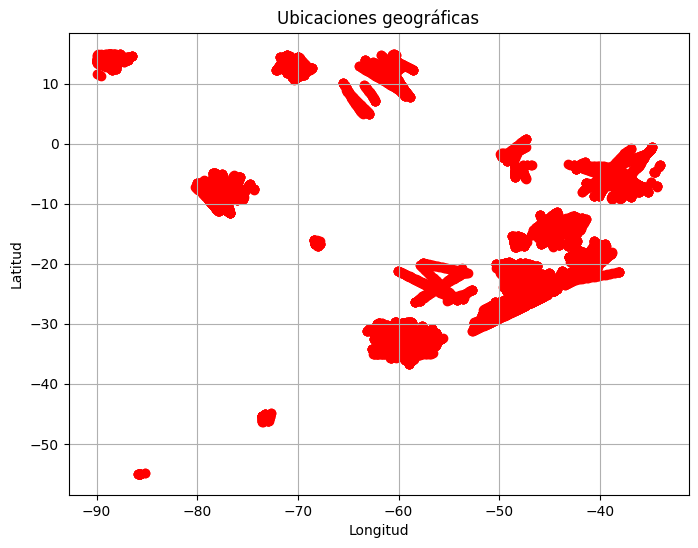

In [283]:
plt.figure(figsize=(8,6))
plt.scatter(df_modified['longitude'], df_modified['latitude'], c='red', marker='o')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ubicaciones geográficas')
plt.grid(True)
plt.show()

### Eliminamos samples que sean exactamente iguales

In [286]:
df_modified.drop_duplicates(subset=['icao24', 'latitude', 'longitude', 'baro_altitude'], inplace=True)
df_modified

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp,año,mes,dia,hora,minuto
0,e8021b,LPE2368,Chile,1750548596,1750548596,-59.7568,-32.8455,10934.70,False,221.01,329.20,2025-06-21 23:30:00+00:00,2025,6,21,23,30
1,e80204,LAN772,Chile,1750548577,1750548577,-48.4337,-25.7672,10652.76,False,287.70,65.04,2025-06-21 23:30:00+00:00,2025,6,21,23,30
2,e0b244,ARG1255,Argentina,1750548596,1750548596,-51.8828,-29.2480,12192.00,False,208.18,226.80,2025-06-21 23:30:00+00:00,2025,6,21,23,30
3,e07583,ARG1843,Argentina,1750548595,1750548596,-58.3590,-34.5908,335.28,False,61.21,303.69,2025-06-21 23:30:00+00:00,2025,6,21,23,30
4,e49eef,GLO7705,Brazil,1750548595,1750548596,-48.9696,-28.2255,11277.60,False,262.97,47.85,2025-06-21 23:30:00+00:00,2025,6,21,23,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19573,347259,AVA217,Spain,1750560445,1750560445,-60.2880,-33.2445,11277.60,False,259.55,144.36,2025-06-22 02:47:00+00:00,2025,6,22,2,47
19574,e80218,LAN096,Chile,1750560084,1750560084,-73.3556,-45.3148,10972.80,False,249.04,5.33,2025-06-22 02:41:00+00:00,2025,6,22,2,41
19575,347259,AVA217,Spain,1750560082,1750560082,-60.8659,-32.5615,11277.60,False,252.97,144.44,2025-06-22 02:41:00+00:00,2025,6,22,2,41
19577,347259,AVA217,Spain,1750560359,1750560359,-60.4274,-33.0809,11277.60,False,259.96,144.42,2025-06-22 02:46:00+00:00,2025,6,22,2,46


### Creacion de features adicionales basado en la ubicacion y generacion de mapas

Hacemos una copia del datadrame anterior:

In [289]:
df_complete = df_modified.copy()

Creamos cuadrantes:

In [292]:
LAT_MIN, LAT_MAX = -60.0, 15.0
LON_MIN, LON_MAX = -90.0, -30.0

QUAD_LAT_SIZE = (LAT_MAX - LAT_MIN) / 2
QUAD_LON_SIZE = (LON_MAX - LON_MIN) / 2

df_complete['lat_bin'] = np.floor((df_complete['latitude']  - LAT_MIN) / QUAD_LAT_SIZE).astype(int)
df_complete['lon_bin'] = np.floor((df_complete['longitude'] - LON_MIN) / QUAD_LON_SIZE).astype(int)

df_complete['lat_bin'] = df_complete['lat_bin'].clip(0, 1)
df_complete['lon_bin'] = df_complete['lon_bin'].clip(0, 1)

df_complete['zone_id'] = (df_complete['lat_bin'].astype(str) + "_" + df_complete['lon_bin'].astype(str))

Generamos un dataset de congestion tanto por zona y por hora:

In [295]:
df_congestion = df_complete.groupby(['zone_id', 'timestamp']).agg({
    'icao24': 'nunique'
}).reset_index().rename(columns={'icao24': 'aircraft_count'})

df_congestion

,zone_id,timestamp,aircraft_count
0,0_0,2025-06-21 23:24:00+00:00,1
1,0_0,2025-06-21 23:25:00+00:00,1
2,0_0,2025-06-21 23:27:00+00:00,2
3,0_0,2025-06-21 23:28:00+00:00,2
4,0_0,2025-06-21 23:29:00+00:00,2
...,...,...,...
833,1_1,2025-06-22 02:54:00+00:00,20
834,1_1,2025-06-22 02:55:00+00:00,20
835,1_1,2025-06-22 02:56:00+00:00,21
836,1_1,2025-06-22 02:57:00+00:00,31


Creamos un umbral mediante el cual medimos se el sector que vemos esta congestionado tanto por sector como por hora:

In [304]:
UMBRAL_CONGESTION = 20

In [307]:
df_congestion['congestion'] = df_congestion['aircraft_count'] > UMBRAL_CONGESTION

# Extraer solo las zonas congestionadas
zonas_congestionadas = df_congestion[df_congestion['congestion']]
zonas_congestionadas

,zone_id,timestamp,aircraft_count,congestion
199,0_1,2025-06-21 23:24:00+00:00,51,True
200,0_1,2025-06-21 23:25:00+00:00,50,True
201,0_1,2025-06-21 23:27:00+00:00,53,True
202,0_1,2025-06-21 23:28:00+00:00,49,True
203,0_1,2025-06-21 23:29:00+00:00,50,True
...,...,...,...,...
831,1_1,2025-06-22 02:52:00+00:00,29,True
832,1_1,2025-06-22 02:53:00+00:00,24,True
835,1_1,2025-06-22 02:56:00+00:00,21,True
836,1_1,2025-06-22 02:57:00+00:00,31,True


In [313]:
zonas_congestionadas = df_congestion[df_congestion['congestion']].copy()

zonas_congestionadas[['lat_bin', 'lon_bin']] = (
    zonas_congestionadas['zone_id']
       .str.split('_', expand=True)
       .astype(int)
)

zonas_congestionadas['lat_center'] = (LAT_MIN + (zonas_congestionadas['lat_bin'] + 0.5) * QUAD_LAT_SIZE)
zonas_congestionadas['lon_center'] = (LON_MIN + (zonas_congestionadas['lon_bin'] + 0.5) * QUAD_LON_SIZE)

Generacion de mapa simple:

In [319]:
# Crear mapa centrado
m = folium.Map(location=[zonas_congestionadas['lat_center'].mean(), zonas_congestionadas['lon_center'].mean()], zoom_start=5)

# Agregar zonas congestionadas al mapa
for _, row in zonas_congestionadas.iterrows():
    folium.CircleMarker(
        location=[row['lat_center'], row['lon_center']],
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row.get('ubicacion_aprox', row['zone_id'])} - {row['aircraft_count']} aviones"
    ).add_to(m)

m.save("mapa_congestion.html")

Generacion de mapa complejo:

In [322]:
LAT_MID = (LAT_MIN + LAT_MAX) / 2
LON_MID = (LON_MIN + LON_MAX) / 2 # df_times

m = folium.Map(
    location=[zonas_congestionadas['lat_center'].mean(),
              zonas_congestionadas['lon_center'].mean()],
    zoom_start=5,
    tiles='cartodbpositron'
)

folium.PolyLine(
    locations=[ [LAT_MID, LON_MIN], [LAT_MID, LON_MAX] ],
    color='black', weight=2, opacity=0.7
).add_to(m)

folium.PolyLine(
    locations=[ [LAT_MIN, LON_MID], [LAT_MAX, LON_MID] ],
    color='black', weight=2, opacity=0.7
).add_to(m)

quadrants = {
    0: [[LAT_MID, LON_MIN], [LAT_MAX, LON_MID]],
    1: [[LAT_MID, LON_MID],  [LAT_MAX, LON_MAX]],
    2: [[LAT_MIN, LON_MIN],  [LAT_MID, LON_MID]],
    3: [[LAT_MIN, LON_MID],  [LAT_MID, LON_MAX]],
}
colors = ['#ffdddd', '#ddffdd', '#ddddff', '#ffddff']
for q, bounds in quadrants.items():
    folium.Rectangle(
        bounds=bounds,
        color=None,
        fill=True,
        fill_color=colors[q],
        fill_opacity=0.1,
        tooltip=f"Cuadrante {q}"
    ).add_to(m)

layer_centers = folium.FeatureGroup(name='Zonas Congestionadas').add_to(m)
for _, row in zonas_congestionadas.iterrows():
    folium.CircleMarker(
        location=[row['lat_center'], row['lon_center']],
        radius=8,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row.get('ubicacion_aprox', row['zone_id'])} — {row['aircraft_count']} aviones"
    ).add_to(layer_centers)

pts = df_complete[
    df_complete['zone_id'].isin(zonas_congestionadas['zone_id'])
].copy()

marker_cluster = MarkerCluster(name='Aviones Individuales').add_to(m)
for _, row in pts.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.4,
        popup=f"ICAO: {row['icao24']}<br>Timestamp: {row['timestamp']}"
    ).add_to(marker_cluster)

folium.LayerControl(collapsed=False).add_to(m)

m.save("mapa_congestion_cuadrantes.html")


### Generacion de datasets

Primero generaremos el dataset completo, con todas las colimnas espaciales y temporales

In [325]:
df_complete.columns

Index(['icao24', 'callsign', 'origin_country', 'time_position', 'last_contact',
       'longitude', 'latitude', 'baro_altitude', 'on_ground', 'velocity',
       'heading', 'timestamp', 'año', 'mes', 'dia', 'hora', 'minuto',
       'lat_bin', 'lon_bin', 'zone_id'],
      dtype='object')

In [328]:
df_complete.to_csv('max_df_all_features.csv', index=False) 

<hr>

### Series Temporales

Principalmente para LSTM

In [32]:
df_edit = df_times.sort_values(by=['icao24', 'timestamp'])
df_edit

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,timestamp,año,mes,dia,hora,minuto,lat_bin,lon_bin,zone_id
846,06a066,QTR780,Qatar,1750291954,1750291954,-41.7711,-22.3035,9448.8,False,272.18,68.72,2025-06-19 00:12:00+00:00,2025,6,19,0,12,1,1,1_1
799,06a066,QTR780,Qatar,1750292014,1750292014,-41.6240,-22.2500,9448.8,False,271.70,68.68,2025-06-19 00:13:00+00:00,2025,6,19,0,13,1,1,1_1
750,06a066,QTR780,Qatar,1750292078,1750292078,-41.4664,-22.1925,9448.8,False,271.88,68.58,2025-06-19 00:14:00+00:00,2025,6,19,0,14,1,1,1_1
699,06a066,QTR780,Qatar,1750292137,1750292137,-41.3226,-22.1399,9448.8,False,272.07,68.48,2025-06-19 00:15:00+00:00,2025,6,19,0,15,1,1,1_1
591,06a066,QTR780,Qatar,1750292197,1750292197,-41.1741,-22.0854,9448.8,False,272.07,68.48,2025-06-19 00:16:00+00:00,2025,6,19,0,16,1,1,1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,e8062a,JAT800,Chile,1750292014,1750292014,-77.0714,-7.4207,10972.8,False,238.72,352.45,2025-06-19 00:13:00+00:00,2025,6,19,0,13,1,0,1_0
1094,e8062a,JAT800,Chile,1750292078,1750292078,-77.0894,-7.2843,10972.8,False,239.23,352.46,2025-06-19 00:14:00+00:00,2025,6,19,0,14,1,0,1_0
971,e8062a,JAT800,Chile,1750292136,1750292136,-77.1062,-7.1579,10972.8,False,237.90,352.05,2025-06-19 00:15:00+00:00,2025,6,19,0,15,1,0,1_0
1053,e8062a,JAT800,Chile,1750292196,1750292196,-77.1230,-7.0306,10972.8,False,236.03,352.61,2025-06-19 00:16:00+00:00,2025,6,19,0,16,1,0,1_0


In [33]:
def generate_sequences(df, sequence_length=5, step=1):
    sequences = []
    labels = []
    for icao, group in df.groupby('icao24'):
        group = group.sort_values('timestamp')
        values = group[['longitude', 'latitude', 'baro_altitude', 'velocity']].values
        for i in range(0, len(values) - sequence_length, step):
            seq = values[i:i+sequence_length]
            target = values[i+sequence_length]  # el valor siguiente (si estás prediciendo)
            sequences.append(seq)
            labels.append(target)
    return np.array(sequences), np.array(labels)

X_seriesTemp, y_seriesTemp = generate_sequences(df_edit, sequence_length=5)

In [34]:
display(X_seriesTemp.shape)
display(y_seriesTemp.shape)

(117, 5, 4)

(117, 4)

In [35]:
n_seq, seq_len, n_features = X_seriesTemp.shape

# Cambiar forma de (117, 5, 4) → (117, 20)
X_flat = X_seriesTemp.reshape((n_seq, seq_len * n_features))

# Generar nombres de columnas como: long_0, lat_0, ..., long_4, lat_4, ...
columns = [f"{feat}_{t}" for t in range(seq_len) for feat in ['longitude', 'latitude', 'baro_altitude', 'velocity']]

df_X_flat = pd.DataFrame(X_flat, columns=columns)
df_y = pd.DataFrame(y_seriesTemp, columns=['longitude_y', 'latitude_y', 'altitude_y', 'velocity_y'])

display(df_X_flat)
display(df_y)

,longitude_0,latitude_0,baro_altitude_0,velocity_0,longitude_1,latitude_1,baro_altitude_1,velocity_1,longitude_2,latitude_2,baro_altitude_2,velocity_2,longitude_3,latitude_3,baro_altitude_3,velocity_3,longitude_4,latitude_4,baro_altitude_4,velocity_4
0,-41.7711,-22.3035,9448.80,272.18,-41.6240,-22.2500,9448.80,271.70,-41.4664,-22.1925,9448.80,271.88,-41.3226,-22.1399,9448.80,272.07,-41.1741,-22.0854,9448.80,272.07
1,-74.1515,4.7105,0.00,7.72,-74.1522,4.7123,0.00,5.40,-74.1386,4.7032,2423.16,77.07,-74.1000,4.6938,2819.40,85.88,-74.0834,4.7328,3116.58,85.90
2,-59.6793,-34.1801,6294.12,175.93,-59.5969,-34.2421,5775.96,171.19,-59.5087,-34.3079,5204.46,168.67,-59.4271,-34.3687,4678.68,176.70,-59.3413,-34.4326,4114.80,175.93
3,-49.3550,-21.4673,11277.60,242.20,-49.2437,-21.5447,11277.60,242.31,-49.1231,-21.6286,11277.60,242.31,-49.0136,-21.7045,10835.64,240.25,-48.9040,-21.7804,10271.76,234.38
4,-62.9135,8.4451,2072.64,92.76,-62.9549,8.4742,2346.96,94.91,-63.0047,8.5108,2407.92,113.18,-63.0520,8.5472,2590.80,111.13,-63.0990,8.5826,2834.64,107.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,-74.0882,4.6913,2971.80,100.52,-74.0779,4.7403,3329.94,108.42,-74.0598,4.8021,3627.12,136.82,-74.0314,4.8854,4130.04,163.18,-74.0025,4.9711,4953.00,163.98
113,-46.6540,-23.3031,1744.98,97.96,-46.7000,-23.3340,1744.98,96.41,-46.7475,-23.3686,1737.36,98.59,-46.7256,-23.4131,1744.98,102.39,-46.6760,-23.4450,1546.86,102.73
114,-39.5008,-3.9743,10789.92,253.07,-39.4835,-3.8374,10668.00,253.13,-39.4653,-3.6935,10660.38,251.47,-39.4485,-3.5604,10660.38,249.43,-39.4317,-3.4273,10660.38,249.43
115,-60.1344,-34.1344,7680.96,184.81,-59.9462,-34.1587,6896.10,179.06,-59.8247,-34.1741,6377.94,175.93,-59.7151,-34.1878,5875.02,176.87,-59.6004,-34.2021,5326.38,173.31


,longitude_y,latitude_y,altitude_y,velocity_y
0,-41.0307,-22.0326,9448.80,272.07
1,-74.0672,4.7804,3459.48,86.39
2,-59.2574,-34.4951,3573.78,174.52
3,-48.8251,-21.8351,9860.28,230.16
4,-63.1478,8.6179,2956.56,112.07
...,...,...,...,...
112,-73.9750,5.0647,5554.98,171.19
113,-46.6276,-23.4735,1295.40,93.08
114,-39.4150,-3.2949,10668.00,249.94
115,-59.4882,-34.2160,4785.36,183.48


In [36]:
df_X_flat.to_csv('df_X_seriesTemp.csv', index=False)
df_y.to_csv('df_y_seriesTemp.csv', index=False)

### Por zonas

Para clasificacion

In [37]:
grouped = df_times.groupby(['timestamp', 'zone_id'])

df_congestion_X = grouped.agg(
    n_aircrafts=('icao24', 'nunique'),
    avg_velocity=('velocity', 'mean'),
    std_altitude=('baro_altitude', 'std'),
    avg_altitude=('baro_altitude', 'mean'),
    n_on_ground=('on_ground', 'sum')
).reset_index()

df_congestion_X

,timestamp,zone_id,n_aircrafts,avg_velocity,std_altitude,avg_altitude,n_on_ground
0,2025-06-19 00:12:00+00:00,0_0,4,207.175000,1879.572540,9692.640000,0
1,2025-06-19 00:12:00+00:00,0_1,79,167.365696,3884.917970,5734.966329,1
2,2025-06-19 00:12:00+00:00,1_0,44,142.916136,3718.703943,5074.400455,7
3,2025-06-19 00:12:00+00:00,1_1,41,204.605366,4011.633214,8353.378537,4
4,2025-06-19 00:13:00+00:00,0_0,1,210.600000,NaN,11582.400000,0
5,2025-06-19 00:13:00+00:00,0_1,97,159.540825,3851.522206,5364.715670,2
6,2025-06-19 00:13:00+00:00,1_0,31,158.962258,3596.911974,5606.845161,4
7,2025-06-19 00:13:00+00:00,1_1,42,202.545476,4181.270672,8454.390000,4
8,2025-06-19 00:14:00+00:00,0_0,1,212.580000,NaN,11590.020000,0
9,2025-06-19 00:14:00+00:00,0_1,81,170.611235,3683.363290,5869.093333,0


In [38]:
df_congestion['congestion'] = (df_congestion['aircraft_count'] >= UMBRAL_CONGESTION).astype(int)
df_congestion_Y = df_congestion[['timestamp', 'zone_id', 'congestion']]
df_congestion_Y

,timestamp,zone_id,congestion
0,2025-06-19 00:12:00+00:00,0_0,0
1,2025-06-19 00:13:00+00:00,0_0,0
2,2025-06-19 00:14:00+00:00,0_0,0
3,2025-06-19 00:15:00+00:00,0_0,0
4,2025-06-19 00:16:00+00:00,0_0,0
5,2025-06-19 00:17:00+00:00,0_0,0
6,2025-06-19 00:12:00+00:00,0_1,1
7,2025-06-19 00:13:00+00:00,0_1,1
8,2025-06-19 00:14:00+00:00,0_1,1
9,2025-06-19 00:15:00+00:00,0_1,1


In [39]:
df_congestion_X.to_csv('df_X_porZonas.csv', index=False)
df_congestion_Y.to_csv('df_Y_porZonas.csv', index=False)

### Dataset espacio-temporal

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1c0c563-baec-4f70-b443-fb48e15d9efd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>